## 빅데이터 기반 AI 응용 솔루션 개발자 전문과정

### 교과목명 : 통계
- 평가일 : 22.09.08
- 성명 : 이정현A
- 점수 : 88점 (2번, 4-4번, 14번, 15번 틀림/ 보너스 문제 맞음 +5)

In [23]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%precision 3

'%.3f'

Q1. df에서 mathematics 점수의 평균값, 중앙값, 최빈값, 분산, 표준편차, 범위, IQR을 구하세요.

In [49]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [50]:
# 수학 점수
math = np.array(df['mathematics'])
math_df = df['mathematics']

# 평균값
mean = np.mean(math)
# 중앙값
medi = math_df.median()
# 최빈값
mo = math_df.mode()
# 분산
var = np.var(math)
# 표준편차
std = np.std(math)
# 범위
rg = np.max(math) - np.min(math)
# IQR
math_q1 = np.percentile(math, 25)
math_q3 = np.percentile(math, 75)
iqr = math_q3 - math_q1

print(f'평균: {mean}, 중앙: {medi}, 분산 : {var : 3f}, 표준편차 : {std :3f}, 범위 : {rg}, IQR : {iqr}', '\n')
print('최빈값')
mo

평균: 78.88, 중앙: 80.0, 분산 :  69.385600, 표준편차 : 8.329802, 범위 : 37, IQR : 8.0 

최빈값


0    77
1    82
2    84
Name: mathematics, dtype: int64

Q2. df.english를 표준화한 후 배열로 변환하여 처음 5개 원소를 출력하세요.

In [51]:
score = df.english
type(score)

pandas.core.series.Series

In [52]:
# 평균
score_mean = np.mean(score)
# 표준편차
score_std = np.std(score)

# 표준화
z_score = (score - score_mean)/score_std
z_score[:5]

student number
1   -1.688430
2    1.094696
3   -0.245327
4   -1.791509
5   -0.142249
Name: english, dtype: float64

Q3. score에 대하여 다음사항을 수행하세요.
- 상자그림으로 시각화하여 이상치 여부를 탐색
- 이상치 값 및 인덱스 출력
- 이상치 삭제
- 상자그림으로 시각화하여 이상치 제거 여부 재확인.

<AxesSubplot:>

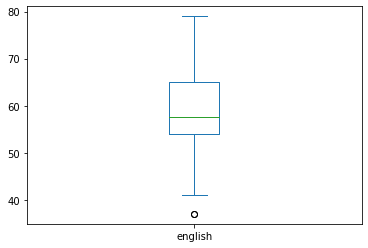

In [53]:
# 1. 상자그림 출력
score.plot(kind = 'box')

=> 이상치 존재

In [54]:
# 이상치 값 구하기

score_q1 = np.percentile(score, 25)
score_q3 = np.percentile(score, 75)
iqr = score_q3 - score_q1
stranger_max = score_q3 + 1.5*iqr
stranger_min = score_q1 - 1.5*iqr
stranger_min, stranger_max # 최소중 가장 최소, 최대 중 가장 최대에서 이상치 존재

(37.500, 81.500)

In [55]:
# 2.  값, 인덱스
score[(score<stranger_min)|(score>stranger_max)]

student number
20    37
35    37
Name: english, dtype: int64

=> 이상치 2명 존재

In [56]:
# 3. 이상치 삭제
score_ = score
score_.pop(20)
score_.pop(35)

37

In [57]:
score_

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
11    70
12    47
13    51
14    64
15    62
16    70
17    71
18    68
19    73
21    65
22    65
23    61
24    52
25    57
26    57
27    75
28    61
29    47
30    54
31    66
32    54
33    54
34    42
36    79
37    56
38    62
39    62
40    55
41    63
42    57
43    57
44    67
45    55
46    45
47    66
48    55
49    64
50    66
Name: english, dtype: int64

<AxesSubplot:>

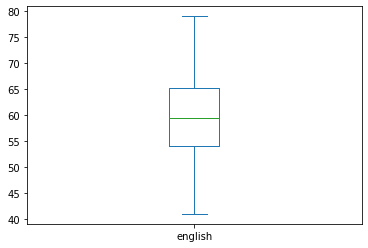

In [58]:
# 상자그림으로 시각화하여 이상치 제거 여부 재확인.
score_.plot(kind = 'box')

Q4. 아래 scores_df에 대해서 아래사항을 수행하세요
- scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
- scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
- 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력) 
- 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

In [60]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/ch2_scores_em.csv',
                 index_col='student number')
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [62]:
# 1. scores_df.english와 scores_df.mathematics에 대한 공분산을 소수점 2째자리까지 출력
cov_df = scores_df.copy()

df_eng = scores_df['english']
df_math = scores_df['mathematics']

cov_df['eng_deviation'] = df_eng - df_eng.mean()
cov_df['math_deviation'] = df_math - df_math.mean()
cov_df[['eng_deviation', 'math_deviation']]

,eng_deviation,math_deviation
student,,
A,-13.0,-6.4
B,14.0,8.6
C,1.0,-8.4
D,-14.0,-8.4
E,2.0,4.6
F,-7.0,-11.4
G,10.0,9.6
H,-6.0,-5.4
I,10.0,6.6


In [72]:
# 2. 두사이의 공분산
%precision 2
cov_mat = np.cov(df_eng, df_math, ddof = 0)
cov_mat[0,1]

62.80

In [73]:
# 3. scores_df.english와 scores_df.mathematics에 대한 상관계수를 소수점 2째자리까지 출력
corr = np.corrcoef(df_eng, df_math)
corr[0,1]

0.82

In [ ]:
# 4. 두개 변수의 상관관계와 회귀직선을 시각화(회귀직선 포함 및 미포함 비교하여 1행 2열로 출력)

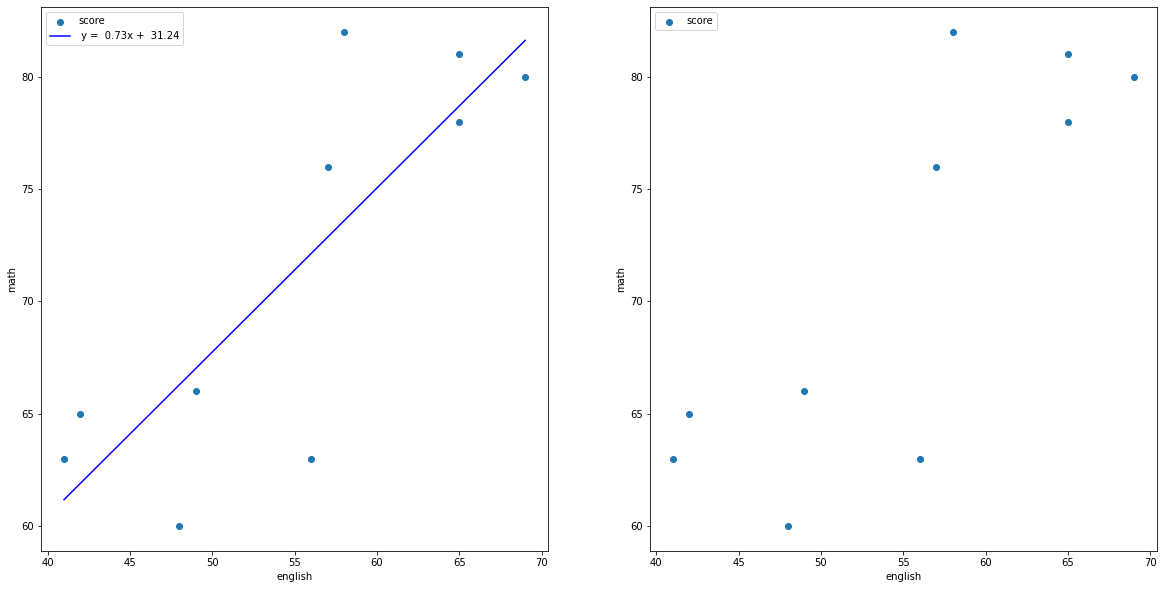

In [174]:
# 계수
poly_fit = np.polyfit(df_eng, df_math, 1)
# x 반환
poly_1d = np.poly1d(poly_fit)

xs = np.linspace(df_eng.min(), df_eng.max())
#y좌표
ys = poly_1d(xs)

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(121)

ax.scatter(df_eng, df_math, label = 'score')
ax.plot(xs, ys, color = 'blue', label = f' y = {poly_fit[0]: .2f}x + {poly_fit[1]: .2f}')
ax.set_xlabel('english')
ax.set_ylabel('math')

ax.legend(loc = 'upper left')

ax1 = fig.add_subplot(122)

ax1.scatter(df_eng, df_math, label = 'score')

ax1.set_xlabel('english')
ax1.set_ylabel('math')

ax1.legend(loc = 'upper left')

plt.show()

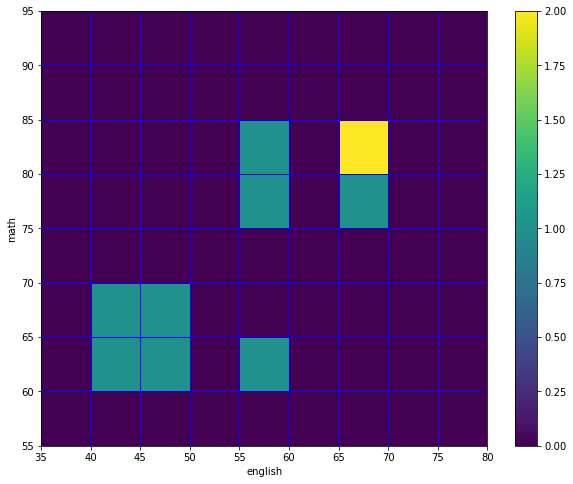

In [80]:
# 5. 두개 변수의 상관관계를 히트맵으로 시각화(칼러바 포함)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)
c = ax.hist2d(df_eng, df_math, bins = [9, 8], range = [(35, 80), (55, 95)], color = 'blue')
ax.set_xlabel('english')
ax.set_ylabel('math')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러바 표시
fig.colorbar(c[3], ax=ax)
plt.show()

-> 다시 풀기

Q5. 아래 scores는 전교생의 시험점수이다. 무작위추출로 표본 크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행해서 그 결과를 히스토그램으로 그려 표본평균이 어떻게 분포되는지 시각화를 수행하세요.

In [81]:
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

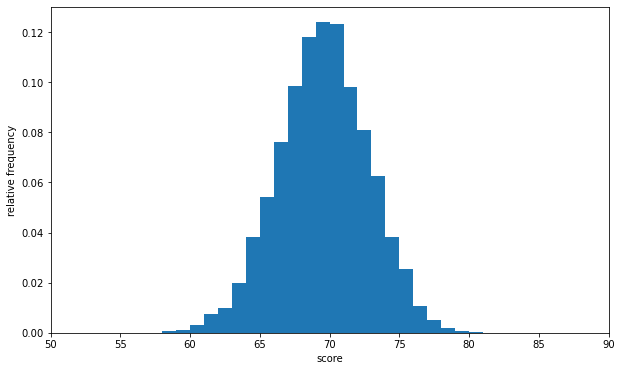

In [84]:
n = 20
sample_size = 10000

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

sample_means = [np.random.choice(scores, n).mean() for _ in range(sample_size)]

ax.hist(sample_means, bins = 100, range = (0, 100), density = True)
ax.set_xlim(50, 90)
ax.set_ylabel('relative frequency') #상대도수
ax.set_xlabel('score')
plt.show()

Q6. Bern(0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요. 

In [85]:
rv = stats.bernoulli(0.5)
b_mean = rv.mean()
b_var = rv.var()
b_mean, b_var

(0.50, 0.25)

Q7. Bin(10,0.5)을 따르는 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [86]:
rv1 = stats.binom(10, 0.5)
bi_mean = rv1.mean()
bi_var = rv1.var()
bi_mean, bi_var

(5.00, 2.50)

Q8. Poi(2)을 따른 확률변수 X에 대하여 기댓값과 분산을 계산하세요.

In [87]:
rv2 = stats.poisson(2)
po_mean = rv2.mean()
po_var = rv2.var()
po_mean, po_var

(2.00, 2.00)

Q9. 평균이 10, 표준편차가 3인 정규분포의 확률밀도함수를 그래프로 표현하세요. 

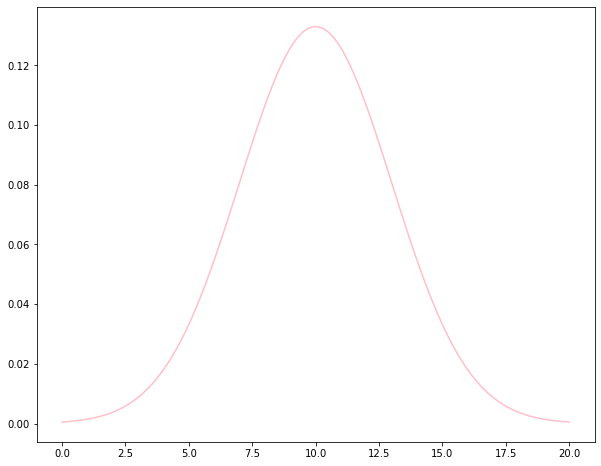

In [92]:
rv = stats.norm(10, 3)

xs = np.linspace(0, 20, 100)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

ax.plot(xs, rv.pdf(xs), label = 'N(10, 9)', color = 'pink')

Q10. 평균이 1, 표준편차가 2인 정규분포의 누적분포함수를 그래프로 표현하세요. 

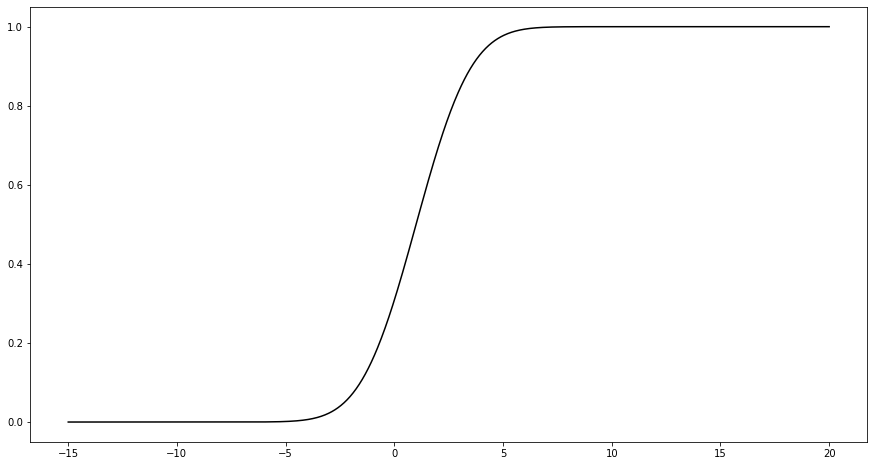

In [185]:
rv = stats.norm(1, 2)

xs = np.linspace(-15, 20, 100)

fig = plt.figure(figsize = (15, 8))
ax = fig.add_subplot(111)

ax.plot(xs, rv.cdf(xs), label = 'N(10, 9)', color = 'black')

Q11. "5_2_fm.csv"을 df1으로 불러와서 다음사항을 수행하세요.
- df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
- df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성 
- df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

In [152]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("data/5_2_fm.csv")
df1

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [153]:
# 1. df1을 df2 이름으로 복사한 후 df2의 species의 A, B를 C,D로 변경하세요.
df2 = df1.copy()

for i in range(len(df1)) :
    if df2.loc[i, 'species'] == 'A':
        df2.loc[i, 'species'] = 'C'
    elif df2.loc[i, 'species'] == 'B':
        df2.loc[i, 'species'] = 'D'
df2

,species,length
0,C,2
1,C,3
2,C,4
3,D,6
4,D,8
5,D,10


In [154]:
# 2. df의 length를 species가 C인 것은 2배로 d인 것은 3배로 변경하여 df1과 df2를 행방향으로 결합, df 생성
df2_ = df2.copy()

def change(x):
    for i in range(len(x)):
        if x.loc[i, 'species'] == 'C':
            x.loc[i, 'length'] = x.loc[i, 'length']*2
        else:
            x.loc[i, 'length'] = x.loc[i, 'length']*3
    df = pd.concat([df1, x])
    return df
df = change(df2)
df

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10
0,C,4
1,C,6
2,C,8
3,D,18


In [159]:
# df를 species 칼럼을 기준으로 그룹별 평균과 표준편차를 산출

df_mean = df.groupby('species').mean()
df_mean # 평균

,length
species,
A,3.0
B,8.0
C,6.0
D,24.0


In [160]:
df_std = df.groupby('species').std()
df_std # 표준편차

,length
species,
A,1.0
B,2.0
C,2.0
D,6.0


Q12. "./dataset/5_2_shoes.csv" 을 데이터프레임으로 불러와서 아래작업을 수행하세요.
- 4행 3열을 복사 후 추가하여 8행 3열로 작성
- 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
- 독립성 검정을 수행(보너스 문제)

In [110]:
import pandas as pd
shoes = pd.read_csv("data/5_2_shoes.csv")
shoes1=shoes.copy()
shoes1

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [114]:
# 4행 3열을 복사 후 추가하여 8행 3열로 작성
df = pd.concat([shoes1, shoes1])
df

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [115]:
# 피봇을 이용해서 교차분석표 작성(values='sales',aggfunc='sum', index= 'store', columns = 'color')
df1 = pd.pivot_table(df,
                    values = 'sales',
                    aggfunc = 'sum',
                    index = 'store',
                    columns = 'color')
df1

color,blue,red
store,,
osaka,26,18
tokyo,20,30


In [116]:
# 독립성 검정을 수행(보너스 문제)

chi2, p, dof, ef = stats.chi2_contingency(df1, correction=False)
chi2, p, dof

(3.41, 0.06, 1)

Q13. 'dataset/titanic3.csv'을 불러와서 pclass 와 sex 칼럼을 각각 인덱스, 칼럼으로 하고 values는 survived, 함수는 mean을 적용하여 pivot_table을 만든 후 히트맵으로 시각화 및 인사이트를 기술하세요

In [161]:
titanic = pd.read_csv('data/titanic3.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


In [162]:
# pclass, sex 인덱스, 칼럼
# values 는 survived, 함수는 mean을 적용, pivot_table 생성 후 히트맵, 인사이트 기술

df = titanic[['pclass', 'sex', 'survived']]
pi_df = pd.pivot_table(df, 
                      values = 'survived',
                    aggfunc = 'mean',
                    index = 'pclass',
                    columns = 'sex')
pi_df

sex,female,male
pclass,,
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.152130


In [163]:
pi_df.index

Int64Index([1, 2, 3], dtype='int64', name='pclass')

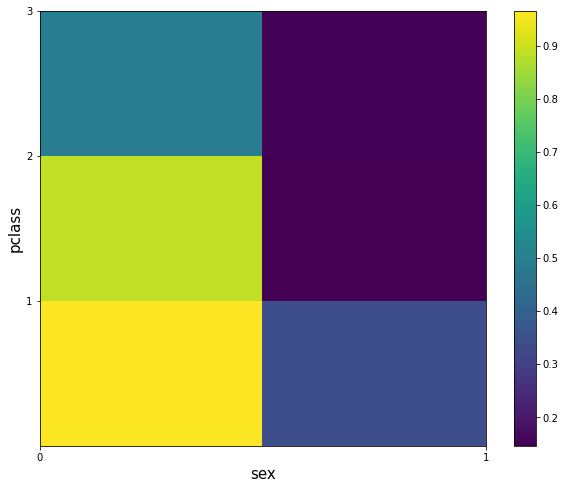

In [180]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pi_df)
ax.set_xticks([0, 2])
ax.set_yticks(np.arange(1, 4))
ax.set_xticklabels([0, 1], minor = False)
ax.set_yticklabels(np.arange(1, 4), minor = False)
ax.set_xlabel('sex', size = 15)
ax.set_ylabel('pclass', size = 15)
fig.colorbar(c, ax=ax)

Q14. 평균 4, 표준편차 0.8인 정규분포에서 샘플사이즈 10인 표본 10000개의 표본평균을 배열로 저장하고 10개를 출력하세요.(넘파이 zeros 함수 이용)

In [183]:
rv = stats.norm(4, 0.8)
n = 10
sample_size = 10000

sample = rv.rvs((n, sample_size))
sample_ = np.mean(sample, axis=0)
sample_[:10]

array([4.23, 4.24, 4.04, 3.8 , 4.03, 3.88, 3.55, 4.11, 3.91, 3.82])

Q15. Q14에서 구한 배열의 히스토그램을 시각화하세요.(확률밀도 포함)

Q16. 서로 독립인 X\~N(1,2), Y\~N(2,3)이 있을 때 확률변수 X + Y의 분포는 N(3,5)를 따른다는 것을 시각화하여 출력하세요.

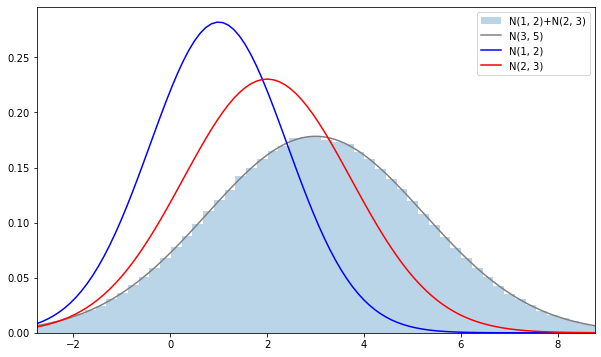

In [143]:
sample_size = int(1e6)
rv1 = stats.norm(1, np.sqrt(2))
x_sam = rv1.rvs(sample_size)
rv2 = stats.norm(2, np.sqrt(3))
y_sam = rv2.rvs(sample_size)

# 합
sum_sample = x_sam + y_sam

# 그래프 출력
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
rv = stats.norm(3, np.sqrt(5))
xs = np.linspace(rv.isf(0.995), rv.isf(0.005), 100)
ax.hist(sum_sample, bins = 100, density = True, label = 'N(1, 2)+N(2, 3)', alpha = 0.3)

ax.plot(xs, rv.pdf(xs), label = 'N(3, 5)', color = 'gray')
ax.plot(xs, rv1.pdf(xs), label = 'N(1, 2)', color = 'blue')
ax.plot(xs, rv2.pdf(xs), label = 'N(2, 3)', color = 'red')

ax.legend()
ax.set_xlim(rv.isf(0.995), rv.isf(0.005))

plt.show()

Q17. 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따른다는 것을 시각화하여 출력하세요.

C:\Users\admin\AppData\Local\Temp\ipykernel_8892\1082376170.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist,_ = np.histogram(sum_poi, bins = 20, range =(0, 20), normed = True)


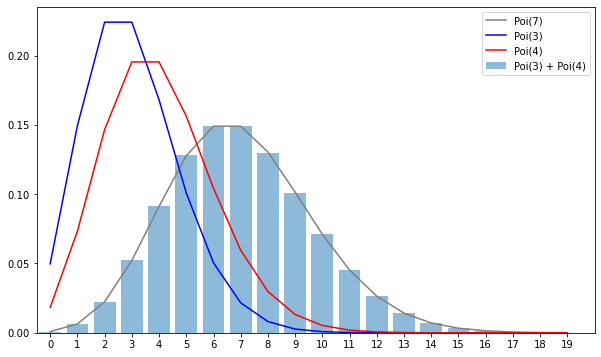

In [140]:
sample_size = int(1e6)
X_poi = stats.poisson(3).rvs(sample_size)
Y_poi = stats.poisson(4).rvs(sample_size)
# 합
sum_poi = X_poi+Y_poi

# 그래프 출력
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
rv = stats.poisson(7)
xs = np.arange(20)
hist,_ = np.histogram(sum_poi, bins = 20, range =(0, 20), normed = True)
ax.bar(xs, hist, alpha = 0.5, label= 'Poi(3) + Poi(4)')
ax.plot(xs, rv.pmf(xs), label = 'Poi(7)', color = 'gray')
ax.plot(xs, stats.poisson(3).pmf(xs), label = 'Poi(3)', color = 'blue')
ax.plot(xs, stats.poisson(4).pmf(xs), label = 'Poi(4)', color = 'red')

ax.legend()
ax.set_xlim(-0.5, 20)
ax.set_xticks(np.arange(20))
plt.show()

Q18. 베르누이 분포의 합은 이항분포가 되는 성질을 시각화하여 출력하세요 

C:\Users\admin\AppData\Local\Temp\ipykernel_8892\1509872741.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, _ = np.histogram(sum_sample, bins = 10, range = (0, 10), normed = True)


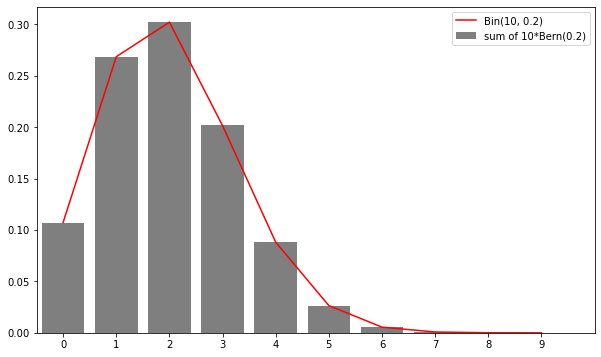

In [138]:
# 성공확률이 0.2인 베르누이 분포 (표본의 크기가 10개씩 백만번 무작위 추출 실행)
p = 0.2
rv1 = stats.bernoulli(p)
sample_size = int(1e6)
Xs = rv1.rvs((10, sample_size))
sum_sample = np.sum(Xs, axis = 0)

# 그래프 출력
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)
rv = stats.binom(10, p)
xs = np.arange(10)
hist, _ = np.histogram(sum_sample, bins = 10, range = (0, 10), normed = True)
ax.bar(xs, hist, alpha = 0.5, label = f'sum of 10*Bern({p})', color = 'k')
ax.plot(xs, rv.pmf(xs), label = f'Bin(10, {p})', color = 'red')
ax.legend()
ax.set_xlim(-0.5, 10)
ax.set_xticks(np.arange(10))
plt.show()

Q19. 포아송 분포의 표본분포는 근사적으로 정규분포를 따른다는 것을 시각화하고 그 핵심 근거인 중심극한정리에 대하여 설명하세요.

In [149]:
lam = 5
rv = stats.poisson(lam)

n = 1000
sample_size = 10000

xs_sample = rv.rvs((n, sample_size))
sample_mean = np.mean(xs_sample, axis=0)
rv_true = stats.norm(lam, np.sqrt(lam/n))
xs = np.linspace(rv_true.isf(0.999), rv_true.isf(0.001), 100)

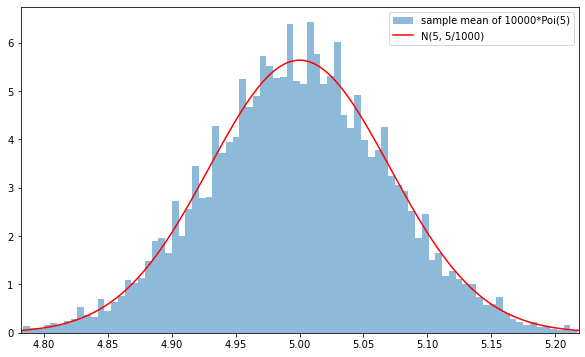

In [150]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = 'sample mean of 10000*Poi(5)')
ax.plot(xs, rv_true.pdf(xs), label = 'N(5, 5/1000)', color = 'red')
ax.legend()
ax.set_xlim(rv_true.isf(0.999), rv_true.isf(0.001))
plt.show()

Q20. 아래 df 데이터셋에서 "무게의 평균이 130kg이다."라는 귀무가설에 대한 유의성 검정을 수행하세요. 

In [130]:
df = pd.read_csv('data/ch11_potato.csv')
print(df.head(),len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05 14


In [131]:
# 모분산을 모름 , 귀무가설 : 무게의 평균이 130kg

def pmean_test(sample, mean0, alpha = 0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)
    
    t = (s_mean - mean0)/np.sqrt(u_var/n)
    if interval[0] <= t<= interval[1]:
        print('귀무가설 채택_무게의 평균은 130g보다 작다고 말할 수 없다.')
    else:
        print('귀무가설을 기각_무게의 평균은 130g보다 작다')
    print(f'p값은 {p: .3f}')

In [132]:
pmean_test(df['무게'], 130)

귀무가설 채택_무게의 평균은 130g보다 작다고 말할 수 없다.
p값은  0.065
